# Week3授業前課題2 住宅価格を予測しよう


# この課題の目的

- データ分析の基本的な流れを知る
- PandasやMatplotlibに慣れる
- Kaggleのカーネルを利用する

# エイムズ市の住宅価格

- アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学ぶ。

- 住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索する。

- エイムズがどのような街なのかもWikipediaなどで確認しておくと良い。

  [Ames, Iowa - Wikipedia](https://en.wikipedia.org/wiki/Ames,_Iowa)

# Kaggleのカーネル

- Kaggleでは「カーネル」としていろいろな人がデータ探索（EDA）を行ったコードが共有されている。
- 良いEDAをたくさん見て、ノウハウを吸収していくこと。
- 今回の課題に取り組む上でも参考にする、あるいは課題に指定されていない項目にも挑戦すると良い。

<参考カーネル>
- [Comprehensive data exploration with Python | Kaggle](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)

<まずはここから>

- [House Prices : EDA to ML (Beginner) | Kaggle](https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner)

- [A Home for Pandas and Sklearn: Beginner How-Tos | Kaggle](https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos)

# データセットの準備

- データセットはKaggleからダウンロードする。

- [House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

# 【課題１】データセットの取得

- pd.read_csv()を使用して、変数に格納する。

In [71]:
# データセットを取得する
df = pd.read_csv("train.csv")

# 取得したデータを概観する
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 【課題２】データセット自体の調査

- KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明する。

- 前回扱ったirisデータセットとの比較もすると良い。

### データセットの調査結果

- 住宅購入者が理想の家を説明する条件を探索するもの（地下室の天井の高さや鉄道への近さを条件にあげることはないと思われる）

- データセットはアイオワ州エイムスの住宅の（ほぼ）あらゆる側面を説明する79の説明変数が含まれている。

- irisのデータは全て定量データ（数値）であったのに対し、今回のデータは定性データ（文字列）も含まれている。

# 【課題３】データの確認

「Week3授業前課題1アヤメを分析しよう」と同様に、データを確認していく。

コードとマークダウンを組み合わせてレポートする。

- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

### 各特徴量を確認する

以下の手順で進めていく。

1. .info()を用いてデータの概要を一覧表示する
2. 一覧表示された概要を整理する

In [72]:
# 1. データの概要を一覧表示する
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### 3. データの特徴量を整理する

  - RangeIndexを見ると、全部で1460行のデータが存在する
  - Columnsを見ると、全部で81列（81種類）のデータが存在する
  - 各列を見ると、non-null が1460ではない、つまりnullが存在するデータもある
  - dtypesを見ると、データ型は3つある：int64(3列), float64（35列）, object（43列）

### 目的変数（SalePrice）を確認する

以下の手順で進めていく。

1. データに含まれる列ラベルの一覧を取得し、目的変数の名前があることを確認する。
2. pd.columuns.get_loc()メソッドを用いて目的変数の列番号を確認する。

In [73]:
# 列ラベルを取得する("SalePrice"が含まれていることを確認できた)
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [74]:
#  目的変数（SalePrice）の列番号を確認する(0列目からスタートすることに注意)
print("SalePriceは{}列目".format(df.columns.get_loc("SalePrice") + 1))

SalePriceは81列目


### 特徴量の平均値と標準偏差、四分位数を一度に表示させる

- .describe()メソッドを用いる


In [75]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 【課題４】欠損値への対応

欠損値に関して以下のことを行い、レポートする。

- 各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページを参照する。

[ResidentMario/missingno: Missing data visualization module for Python.](https://github.com/ResidentMario/missingno)

- 欠損値が何パーセント含まれるかを確認する。

In [76]:
# 各特徴量の欠損値の有無を確認する
import missingno as msno

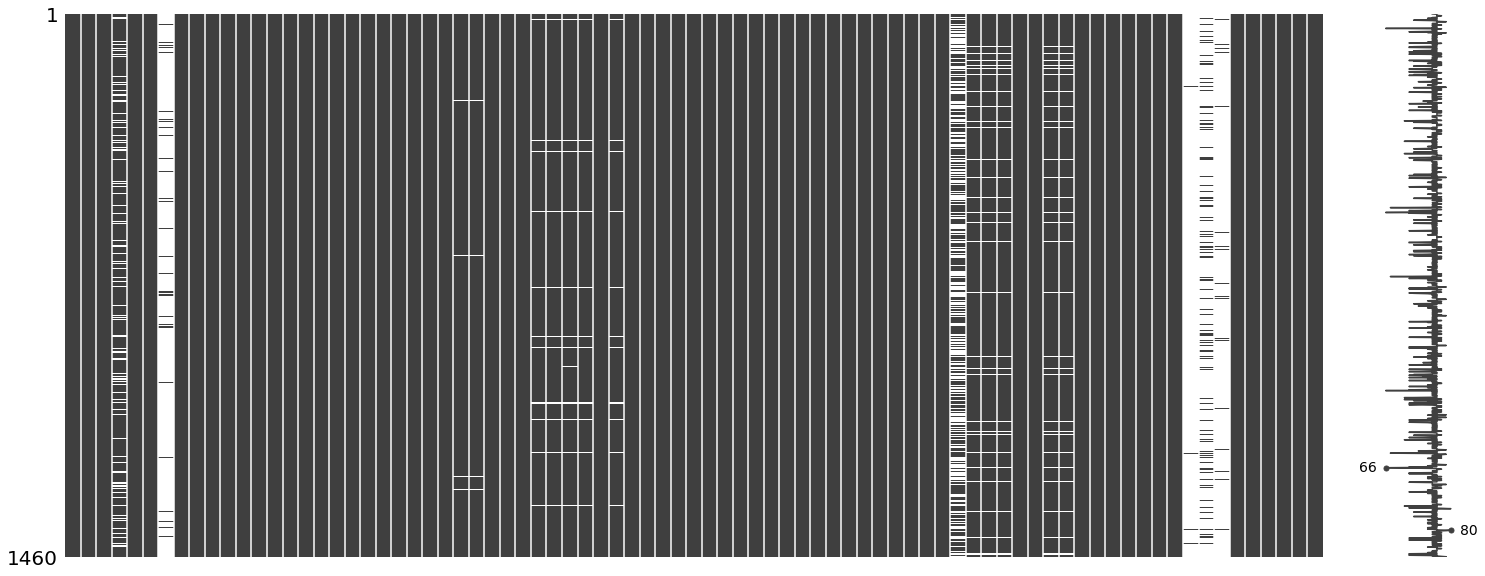

In [77]:
# matrixで欠損値の有無を確認
msno.matrix(df)

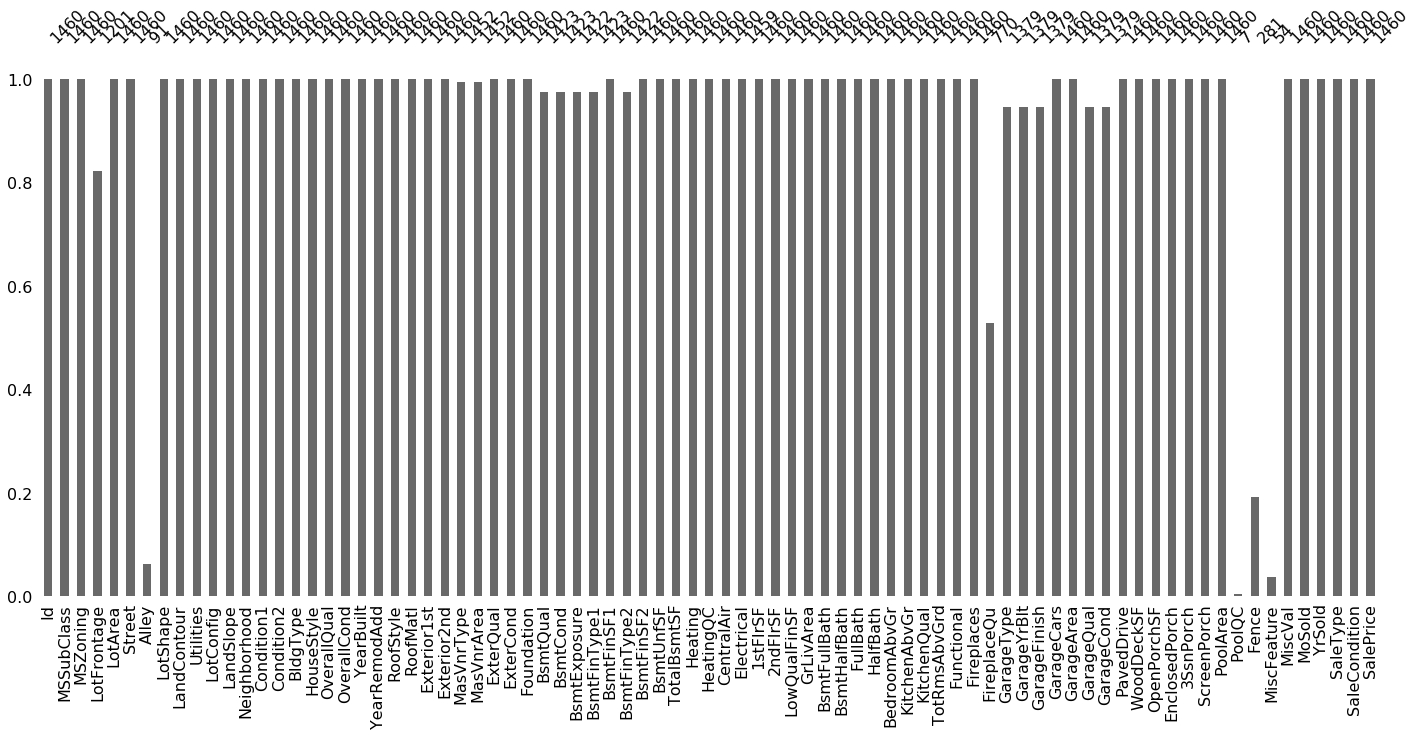

In [78]:
# barchartで欠損値の有無を確認
msno.bar(df)

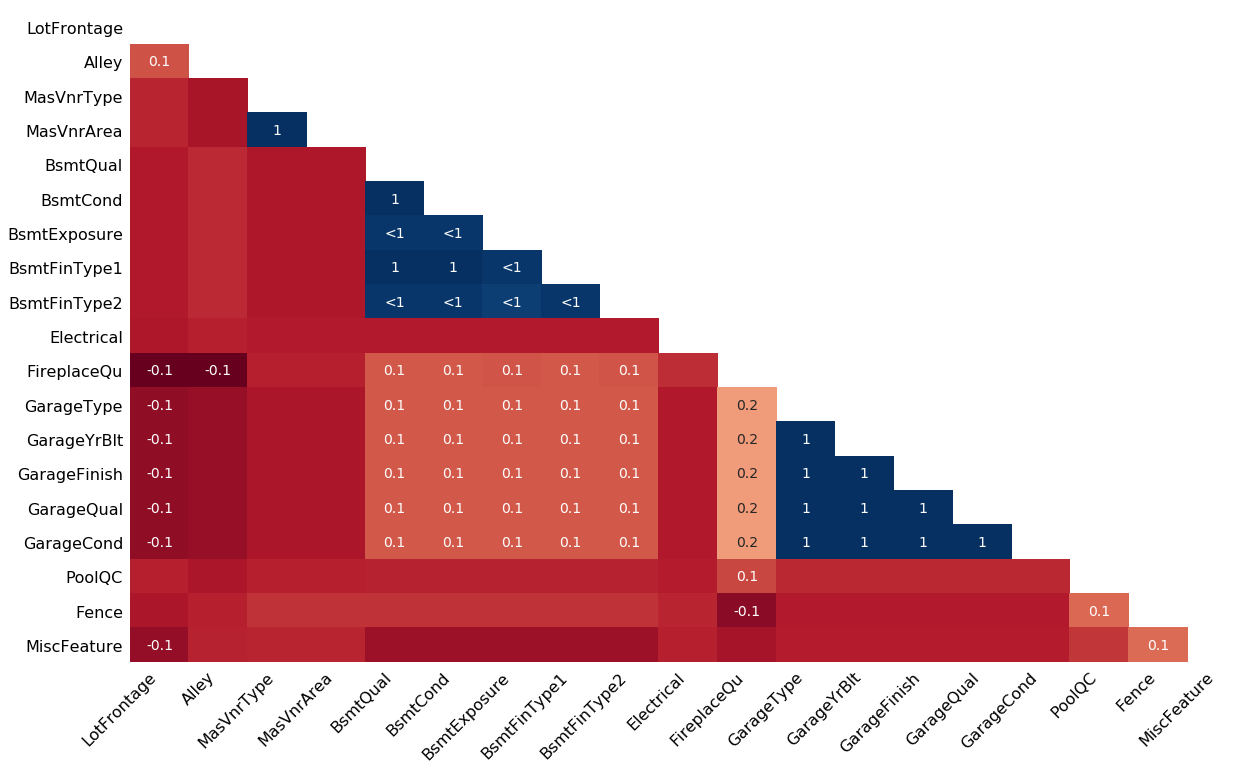

In [79]:
# heatmapで欠損値の有無を確認
msno.heatmap(df)

In [80]:
# 欠損値が何%含まれているか確認する
# 一覧表示
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [81]:
# 欠損値が何%含まれているか確認する
# 欠損値の総数を計算

null_num = df.isnull().values.sum() # 欠損値の総数
total = df.size # データの総数

null_num_ratio = null_num / total
print("欠損値の割合は{:.2f}%".format(null_num_ratio * 100))

欠損値の割合は5.89%


# 【課題５】用語の調査

以下の２つの単語について、調査してまとめること。

- 尖度
- 歪度

<調査結果>
1. 尖度

  - 分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示す。
  - 正規分布より尖った分布（データが平均付近に集中し、分布の裾が重い）のときには正の値を、正規分布より平らな分布（データが平均付近から散らばり、分布の裾が軽い）のときには負の値を取る。正規分布の場合には0になる。
  - サンプルサイズをn、各データの平均値を$x_{ave}$、標準偏差をsとすると尖度は次の式から求まる。
  
  $$
  n(n+1)/(n-1)(n-2)(n-3)Σ(x_i - x_{ave})^4/s^4 - 3(n -1)^2/(n-2)(n-3)
  $$
  

2. 歪度

  - 分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標
  - 「右裾が長い」もしくは「右に歪んだ」もしくは「左に偏った」分布のときには正の値を、「左裾が長い」もしくは「左に歪んだ」もしくは「右に偏った」分布のときには負の値をとる。左右対称の分布（例えば正規分布）の場合には0になる。
  - サンプルサイズをn、各データの平均値x_を、標準偏差をsとすると歪度は次の式から求まる。
  
  $$
  n/(n-1)(n-2)Σ(x_i - x_{ave})^3 / s^3
  $$

# 【課題６】分布の確認

- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
- 目的変数に対して対数変換を行う。
- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明すること。このように加工することで予測時の精度を上げることができます。

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


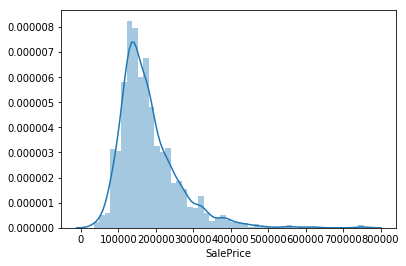

In [82]:
# seabornを用いて目的変数の分布を表示する

sns.distplot(df.SalePrice)

In [83]:
# SalePriceの「尖度」と「歪度」を算出する

ds = pd.DataFrame(index = ("SalePrice",)) # 統計量を格納するデータフレームを作成する
ds["count"] = df.count()["SalePrice"] # データ個数をカウントする
ds["mean"] = df.mean()["SalePrice"] # 平均値を計算する
ds["std"] = df.std()["SalePrice"] # 標準偏差を計算する
ds["skew"] = df.skew()["SalePrice"] # 歪度（skew）を計算する
ds["kurtosis"] = df.kurtosis()["SalePrice"] # 尖度（kurtosis）を計算する

# 出力する
ds

,count,mean,std,skew,kurtosis
SalePrice,1460,180921.19589,79442.502883,1.882876,6.536282


In [84]:
# 目的変数（SalePride）を対数変換して、データフレームに追加する

df["log_saleprice"] = df.SalePrice.apply(np.log)
df["log_saleprice"]

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

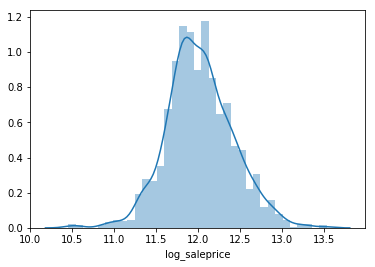

In [85]:
# 対数変換したものに対して分布を表示する

sns.distplot(df.log_saleprice)

In [86]:
#  対数変換した目的変数の分布の「尖度」と「歪度」を算出する。

ds = pd.DataFrame(index = ("log_SalePrice",)) # 統計量を格納するデータフレームを作成する
ds["count"] = df.count()["log_saleprice"] # データ個数をカウントする
ds["mean"] = df.mean()["log_saleprice"] # 平均値を計算する
ds["std"] = df.std()["log_saleprice"] # 標準偏差を計算する
ds["skew"] = df.skew()["log_saleprice"] # 歪度（skew）を計算する
ds["kurtosis"] = df.kurtosis()["log_saleprice"] # 尖度（kurtosis）を計算する

# 出力する
ds

,count,mean,std,skew,kurtosis
log_SalePrice,1460,12.024051,0.399452,0.121335,0.809532


### 対数変換に対する考察

- 歪度が低下していることからも分かる通り、裾野が右に広かった（値が大きい方向に裾野が長かった）分布が左右対称（正規分布）に近付いている。
- 歪度が低下した一方、尖度が上昇しており、分布の中心性が高まっていることも確認される。

# 【課題７】相関係数の確認

特徴量を確認する。それぞれに対してマークダウンで説明や考察を書くこと。

- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。


<補足>
- 重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがある。
- このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがある。

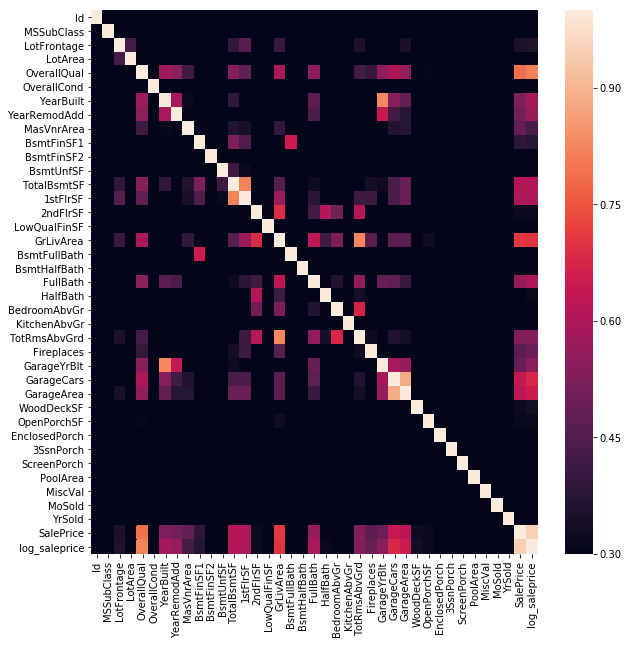

In [98]:
 # 相関係数行列のヒートマップを作成する
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.corr() # 相関係数行列を作成する
#df_corr
plt.figure(figsize =(10, 10))
sns.heatmap(df_corr, vmax = 1, vmin = 0.3)

### 目的変数と相関の高い変数を抽出する

以下の通り、目的変数と相関の高い変数を抽出した。

1. OverallQual
2. YearBuiltt
3. YearRemodAdd
4. MasVnrArea
5. 1stFlrSF
6. TotalBsmtSF
7. FullBath
8. GrLivArea
9. GarageCars
10. GarageArea

In [99]:
# 抽出した説明変数と目的変数の相関係数行列を作成する

label = ["OverallQual", "YearBuilt", "YearRemodAdd", "MasVnrArea", "1stFlrSF", "TotalBsmtSF","FullBath", "GrLivArea", "GarageCars", "GarageArea", "SalePrice"]
df_corr = df[label].corr()
df_corr

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,1stFlrSF,TotalBsmtSF,FullBath,GrLivArea,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.411876,0.476224,0.537808,0.550600,0.593007,0.600671,0.562022,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.315707,0.281986,0.391452,0.468271,0.199010,0.537850,0.478954,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.179618,0.240379,0.291066,0.439046,0.287389,0.420622,0.371600,0.507101
MasVnrArea,0.411876,0.315707,0.179618,1.000000,0.344501,0.363936,0.276833,0.390857,0.364204,0.373066,0.477493
1stFlrSF,0.476224,0.281986,0.240379,0.344501,1.000000,0.819530,0.380637,0.566024,0.439317,0.489782,0.605852
TotalBsmtSF,0.537808,0.391452,0.291066,0.363936,0.819530,1.000000,0.323722,0.454868,0.434585,0.486665,0.613581
FullBath,0.550600,0.468271,0.439046,0.276833,0.380637,0.323722,1.000000,0.630012,0.469672,0.405656,0.560664
GrLivArea,0.593007,0.199010,0.287389,0.390857,0.566024,0.454868,0.630012,1.000000,0.467247,0.468997,0.708624
GarageCars,0.600671,0.537850,0.420622,0.364204,0.439317,0.434585,0.469672,0.467247,1.000000,0.882475,0.640409
GarageArea,0.562022,0.478954,0.371600,0.373066,0.489782,0.486665,0.405656,0.468997,0.882475,1.000000,0.623431


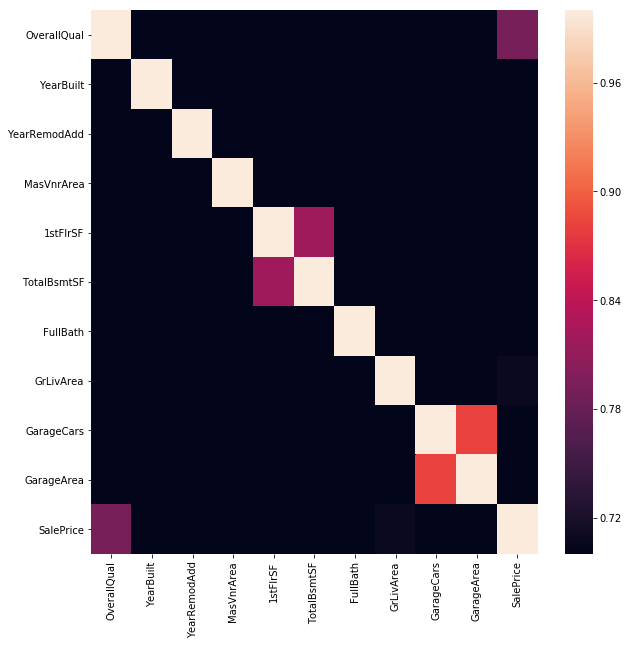

In [107]:
# heatmapを作成
plt.figure(figsize= (10, 10))
sns.heatmap(df_corr, vmin = 0.7) # 相関係数が高い組み合わせを選ぶため、下限をを高めに設定（0.7とした）

# 選んだ10個の特徴量が何か表しているか?

KaggleのDataDescriptionの記述を参考に日本語でまとめる。

1. OverallQual： 建築素材と仕上げの品質（Overall material and finish quality）
2. YearBuiltt：建築年数（Original construction date）
3. YearRemodAdd：改築日（Remodel date）
4. MasVnrArea：石積みベニアの面積（Masonry veneer area in square feet）
5. 1stFlrSF：１階の面積(First Floor square feet)
6. TotalBsmtSF：地下階の面積（Total square feet of basement area）
7. FullBath：地上階のバスルームの広さ（Full bathrooms above grade）
8. GrLivArea：地上階のリビングの広さ（Above grade (ground) living area square feet）
9. GarageCars：ガレージの容積（Size of garage in car capacity）
10. GarageArea：ガレージの面積（Size of garage in square feet）

# 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

1. OverallQual & SalePrice：建築品質と住宅価格が高いというのは、直観とも整合する。
2. 1stFlrSF & TotalBsmtSF：地下面積と１階の面積は比例関係にあると思われ、直観とも整合する。
3. Garage Cars & Garage Area：ガレージの面積が広いほど容積も大きいとと思われるので、直観とも整合する。

# 【課題８】重要度の算出

- ランダムフォレストという機械学習手法を用いることで、重要度の値を算出できる。
- この値は推定を行った時に、各特徴量がどれだけ推定値に寄与しているかを表す。
- ランダムフォレストは推定によく使われる手法だが、ここでは推定自体が目的ではなく、あくまで重要度を算出するために使う。

In [122]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

label = ["OverallQual", "YearBuilt", "YearRemodAdd", "MasVnrArea", "1stFlrSF", "TotalBsmtSF","FullBath", "GrLivArea", "GarageCars", "GarageArea"]

# データの前処理（欠損値を中央値で穴埋めする）
df[label] = df[label].fillna(df[label].median())

#  説明変数、目的変数の設定
X = df[label]
y = df.SalePrice

# 学習用データ、テストデータに分類する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train) # フィッティング
y_pred = clf_rf.predict(X_test) # 説明変数から目的変数の予測値を導く

accu = accuracy_score(y_test, y_pred) # 目的変数の予測値の精度を推計
print('accuracy = {:>.4f}'.format(accu))

# 重要度分析
fti = clf_rf.feature_importances_   

print('重要度:')
for i, feat in enumerate(df[label]):
    print('\t{0:20s} : {1:>.6f}'.format(feat, fti[i]))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy = 0.0034
重要度:
	OverallQual          : 0.065213
	YearBuilt            : 0.128204
	YearRemodAdd         : 0.116906
	MasVnrArea           : 0.075133
	1stFlrSF             : 0.146575
	TotalBsmtSF          : 0.144497
	FullBath             : 0.021801
	GrLivArea            : 0.143279
	GarageCars           : 0.025715
	GarageArea           : 0.132676


# 【課題９】さらなる探索

Kaggleのカーネルを参考に、ここまでの課題にないことにも挑戦し、ノートブックにまとめる。

### カテゴリー変数と目的変数の関係性を分析する（Boxplot）

説明変数として以下を採用した。

- Overall Quality
- Year Built

Text(0.5, 1.0, 'Overall Qual')

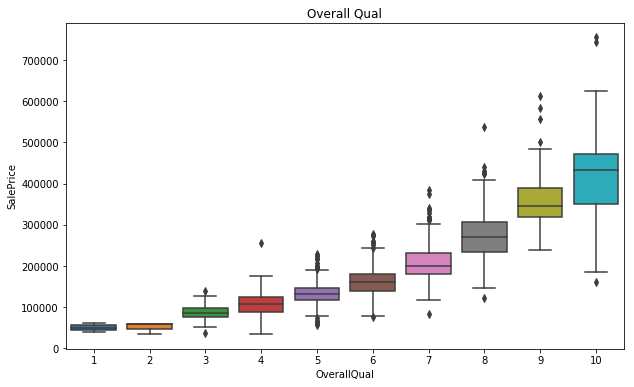

In [136]:
#  カテゴリー変数と目的変数の関係性を分析する（Boxplot）
# 説明変数にOverall Qualityをとる
var = "OverallQual"
data = pd.concat([df["SalePrice"], df[var]], axis = 1) # axis = 1で横方向に連結

f, ax = plt.subplots(figsize = (10, 6))
fig = sns.boxplot(x = var, y = "SalePrice", data = data)
ax.set_title("Overall Qual")

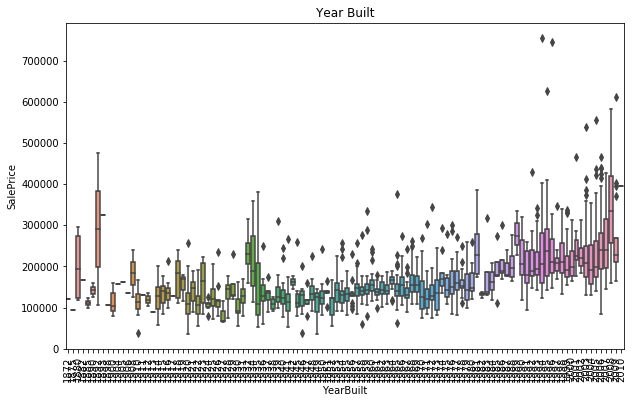

In [140]:
#  カテゴリー変数と目的変数の関係性を分析する（Boxplot）
# 説明変数にYearbulitをとる

var = "YearBuilt"
data = pd.concat([df["SalePrice"], df[var]], axis = 1) # axis = 1で横方向に連結

# 描画の設定
f, ax = plt.subplots(figsize = (10, 6))
ax.set_title("Year Built")
plt.xticks(rotation = 90)

# figureの生成
fig = sns.boxplot(x = var, y = "SalePrice", data = data)

# 本課題からの学び

- まず何より、①問題意識を明確にすること（目的変数を何にするか？）、②仮説を立てること（どのような説明変数が考えられるか？ その中で目的変数との因果関係・相関関係が高いものは何か？）が重要。


- 問題意識・仮説が明確でなければ、大量のデータ処理に追われるだけになってしまう（生産性がなく、何より面白くない）。


- データの可視化の有用性を認識した。特に有用だと感じたことは以下。
  - Violinplot：分布頻度を概観できる
  - Boxplot：最大値・最小値・四分位数を
  - 相関係数行列のヒートマップ：視覚的に分かりやすく有用。また、上限・下限の設定により値を絞り込める。


- 可視化ツールも複数あるので、繰り返し用いて理解を深め、使い分けできるようにする。

  - matplotlib：
  - seaborn：データラベル（目的変数）毎に色分け出来る機能が有用（引数hueに目的変数をセット）


- データの前処理の重要性も認識した。

  - 欠損値が含まれていると、ランダムフォレストによる重要度分析でエラーが出てしまった。
  - 欠損値を.fillna()メソッドで埋めることができると分かったのは大きな進歩。
  - .fillna()メソッドで埋める時に用いる値として中央値を採用したが、どのような値で埋めるのが望ましいのか、さらに調べる必要がある。
  - 定性データを定量データに変換して相関関係を分析できなかったので、ここも課題。